# FastAI Simpson Image Classification

In [ ]:
!pip install fastai==2.0.10

     |████████████████████████████████| 358kB 2.8MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

## Get data

In [ ]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 2.6MB/s 
     |████████████████████████████████| 5.3MB 8.2MB/s 
     |████████████████████████████████| 133kB 53.7MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 112kB 58.0MB/s 


In [ ]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [ ]:
path = Path('simpson')
path.mkdir(parents=True, exist_ok=True)

In [ ]:
!kaggle datasets download alexattia/the-simpsons-characters-dataset -p "{path}" --unzip

 99% 1.06G/1.08G [00:41<00:00, 31.2MB/s]
100% 1.08G/1.08G [00:41<00:00, 28.1MB/s]


In [ ]:
!ls {path}/simpsons_dataset

abraham_grampa_simpson	  homer_simpson        otto_mann
agnes_skinner		  kent_brockman        patty_bouvier
apu_nahasapeemapetilon	  krusty_the_clown     principal_skinner
barney_gumble		  lenny_leonard        professor_john_frink
bart_simpson		  lionel_hutz	       rainier_wolfcastle
carl_carlson		  lisa_simpson	       ralph_wiggum
charles_montgomery_burns  maggie_simpson       selma_bouvier
chief_wiggum		  marge_simpson        sideshow_bob
cletus_spuckler		  martin_prince        sideshow_mel
comic_book_guy		  mayor_quimby	       simpsons_dataset
disco_stu		  milhouse_van_houten  snake_jailbird
edna_krabappel		  miss_hoover	       troy_mcclure
fat_tony		  moe_szyslak	       waylon_smithers
gil			  ned_flanders
groundskeeper_willie	  nelson_muntz


In [ ]:
dls = ImageDataLoaders.from_folder(path=path/'simpsons_dataset', valid_pct=0.2, seed=42, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))

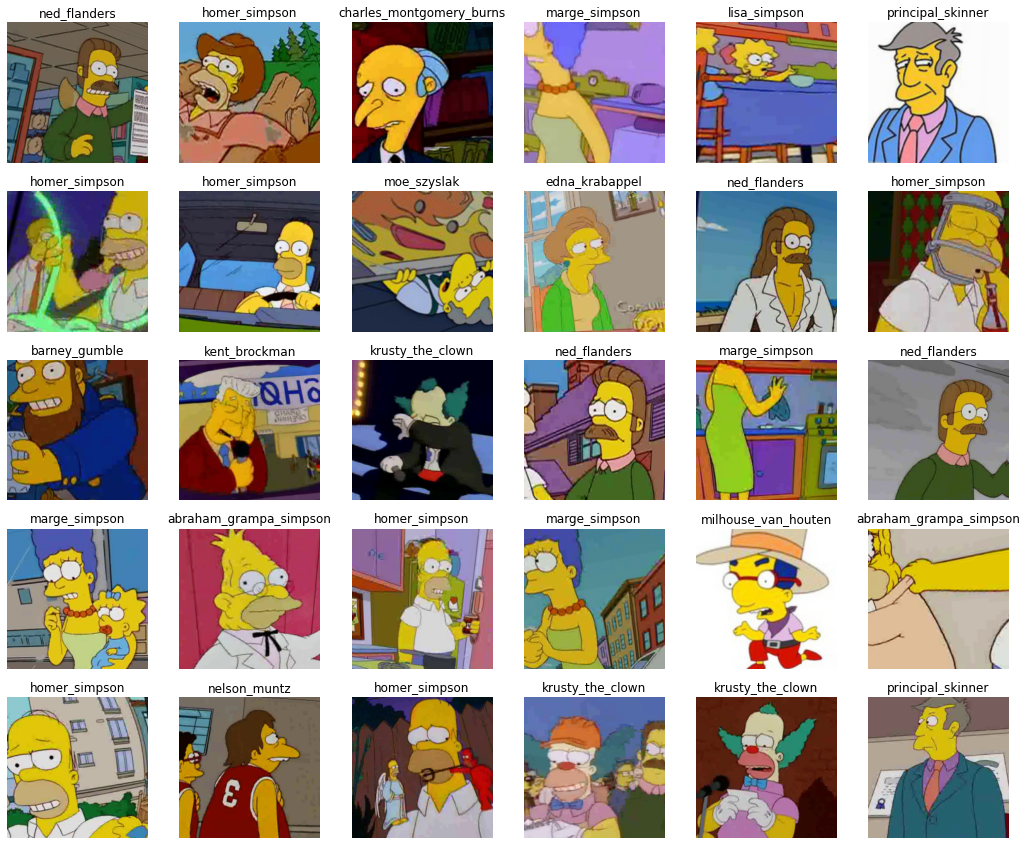

In [ ]:
dls.show_batch(max_n=30)

In [ ]:
simpson_datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                              get_items=get_image_files,
                              splitter=RandomSplitter(seed=42),
                              get_y=parent_label,
                              item_tfms=Resize(460),
                              batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = simpson_datablock.dataloaders(path/'simpsons_dataset')

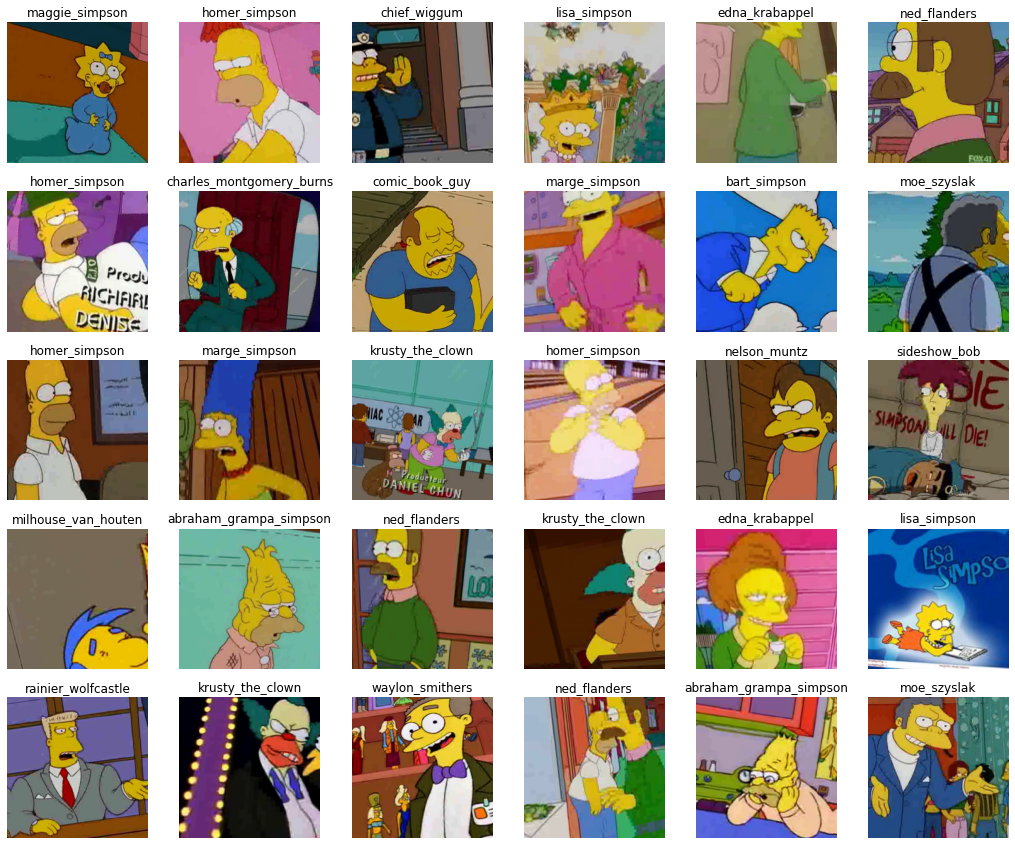

In [ ]:
dls.show_batch(max_n=30)

## Training

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn

In [ ]:
doc(learn.fit_one_cycle)

Learner.fit_one_cycle(n_epoch, lr_max=None, div=25.0, div_final=100000.0, pct_start=0.25, wd=None, moms=None, cbs=None, reset_opt=False)
Fit `self.model` for `n_epoch` using the 1cycle policy.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.001312,0.508941,0.140213,05:00


epoch,train_loss,valid_loss,error_rate,time
0,0.324120,0.162553,0.041204,05:11
1,0.163842,0.088078,0.019945,05:19
2,0.108342,0.048376,0.011346,05:19
3,0.059528,0.039371,0.007882,05:23


In [ ]:
learn.unfreeze()

Minimum/10: 3.31e-07, steepest point: 1.10e-06


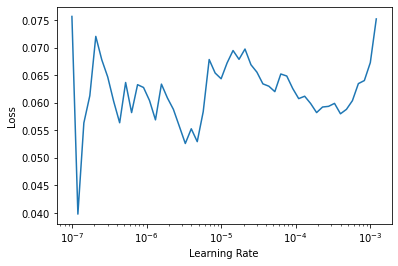

In [ ]:
lr_min, lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fit_one_cycle(4, max_lr=lr_min)

epoch,train_loss,valid_loss,error_rate,time
0,0.514541,0.424325,0.110116,05:24
1,0.321332,0.204381,0.055536,05:21
2,0.140918,0.076693,0.019228,05:21
3,0.078456,0.056674,0.012660,05:09


In [ ]:
learn.save('simpson-image-classifier')

Path('models/simpson-image-classifier.pth')

## Make predictions

In [ ]:
files = get_image_files(path/"simpsons_dataset")

In [ ]:
learn.predict(files[0])

('abraham_grampa_simpson',
 tensor(0),
 tensor([1.0000e+00, 1.1877e-09, 1.7284e-11, 2.6845e-08, 8.7371e-09, 4.4549e-10,
         1.2088e-11, 1.4615e-11, 1.4938e-10, 1.4352e-11, 5.1114e-10, 3.1860e-10,
         2.3222e-11, 1.3183e-08, 3.1475e-10, 5.0995e-10, 5.7496e-10, 2.1545e-12,
         3.2370e-10, 5.4692e-10, 1.3310e-10, 9.4075e-09, 1.3110e-10, 2.1596e-10,
         1.0587e-11, 3.6889e-11, 1.0946e-09, 1.2173e-11, 1.1661e-11, 1.2190e-11,
         8.1785e-12, 1.6830e-10, 2.5820e-10, 4.9428e-09, 1.8619e-11, 1.0995e-09,
         1.6268e-08, 2.5721e-11, 4.4222e-10, 4.4635e-11, 3.9495e-11, 2.8060e-10]))

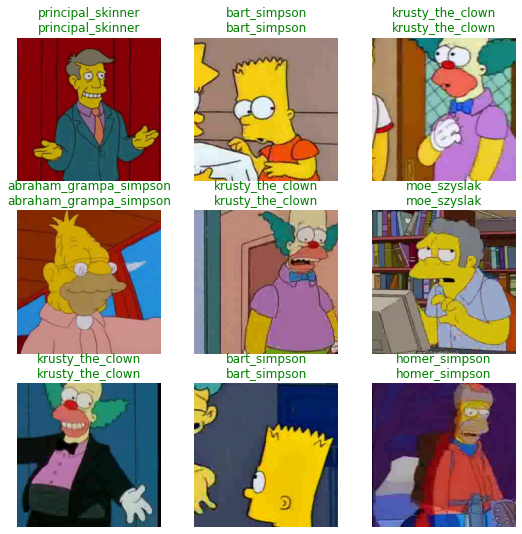

In [ ]:
learn.show_results()

## Interpretation

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))